<a href="https://colab.research.google.com/github/krimoe/unsupervised-learning-Machine-Learning/blob/main/Credit_Card_holder_classifer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns

In [ ]:
#reading dataset after charging
data = pd.read_csv('/content/CC GENERAL.csv')
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
data.MINIMUM_PAYMENTS.mode()

0    299.351881
dtype: float64

In [ ]:
data.CREDIT_LIMIT.mode()

0    3000.0
dtype: float64

In [ ]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
#Pre-processing
data.shape

(8950, 18)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
data.drop('CUST_ID',axis=1,inplace=True)

In [ ]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8945    False
8946    False
8947    False
8948    False
8949    False
Length: 8950, dtype: bool

In [ ]:
data.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean() , inplace = True)
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean() , inplace = True)

In [ ]:
data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
#hierarchical clustering
import scipy.cluster.hierarchy as sch 
from sklearn.cluster import AgglomerativeClustering 

In [ ]:
model=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(data) 

In [ ]:
df=pd.DataFrame(clust_labels)
df

,0
0,0
1,0
2,0
3,0
4,0
...,...
8945,0
8946,0
8947,0
8948,0


In [ ]:
df.value_counts()

0    8921
2      22
1       7
dtype: int64

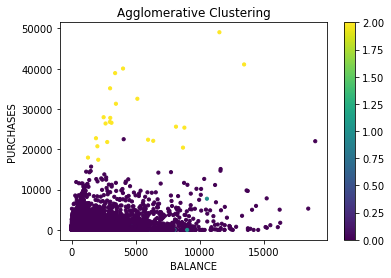

In [ ]:
#Tracez les grappes. 
import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data ['BALANCE'] , data ["PURCHASES"] , c= df[0], s=10)
ax.set_title("Agglomerative Clustering")
ax.set_xlabel("BALANCE")
ax.set_ylabel("PURCHASES")
plt.colorbar(scatter)

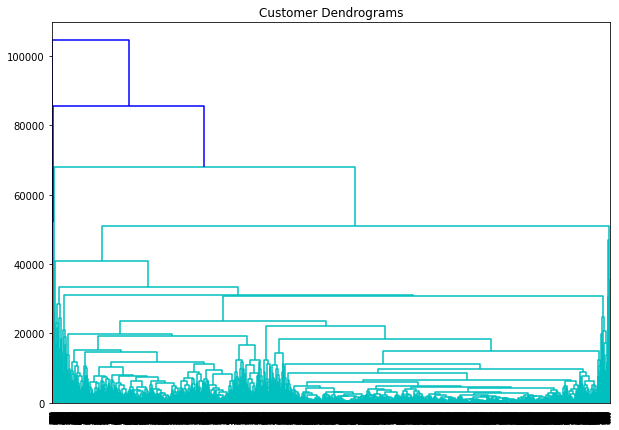

In [ ]:
#Tracez le dendrogramme. 
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(data, method="complete"))

In [ ]:
#clustering k-means. 
from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans
kmeans=KMeans(n_clusters=3, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(data)

KMeans(n_clusters=3, random_state=0)

In [ ]:
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,1
1,0
2,0
3,0
4,1
...,...
8945,1
8946,1
8947,1
8948,1


In [ ]:
kmeans.predict(data)
print(kmeans.cluster_centers_)

[[3.38437741e+03 9.40633662e-01 1.58295903e+03 9.88230993e+02
  5.95038513e+02 2.11246771e+03 5.40499429e-01 3.16939855e-01
  3.85650235e-01 2.10080036e-01 5.72419775e+00 2.21322637e+01
  8.99427777e+03 2.89211053e+03 1.55916469e+03 1.35204183e-01
  1.17385082e+01]
 [8.54809529e+02 8.54161652e-01 6.02666564e+02 3.12080877e+02
  2.90884840e+02 4.94282667e+02 4.67368228e-01 1.54005733e-01
  3.52144432e-01 1.06792419e-01 2.25376113e+00 1.06555112e+01
  2.74239608e+03 9.95880355e+02 5.85241721e+02 1.56660059e-01
  1.14326067e+01]
 [4.84189326e+03 9.11252077e-01 1.07893056e+04 7.61968438e+03
  3.16979046e+03 5.15222013e+03 7.52377608e-01 5.99535492e-01
  6.04122562e-01 2.26540108e-01 9.20000000e+00 8.62000000e+01
  1.24657692e+04 1.81174305e+04 2.51500153e+03 3.34474108e-01
  1.18384615e+01]]


In [ ]:
#Essayez différentes valeurs de k et sélectionnez la meilleure. 
Sum_of_squared_distances = []
K = range(1,15)
for k in K :
  km = KMeans(n_clusters=k)
  km=km.fit(data)
  Sum_of_squared_distances.append(km.inertia_)

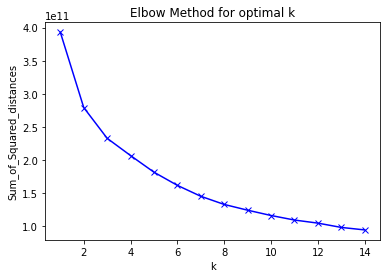

In [ ]:
plt.plot(K,Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_Squared_distances')
plt.title('Elbow Method for optimal k')
plt.show()


best k est égale à 3, c'est le point coudé.

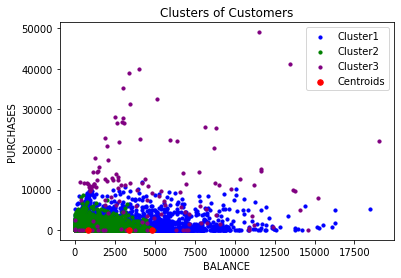

In [ ]:
#Tracez les grappes. 
plt.scatter(data["BALANCE"][kmeans.labels_ == 0],          
            data["PURCHASES"][kmeans.labels_ == 0],s=10,c='blue',label='Cluster1')
plt.scatter(data["BALANCE"][kmeans.labels_ == 1],
           data["PURCHASES"][kmeans.labels_ == 1],s=10,c='green',label='Cluster2')
plt.scatter(data["BALANCE"][kmeans.labels_ == 2],
           data["PURCHASES"][kmeans.labels_ == 2],s=10,c='purple',label='Cluster3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=30, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.legend()
plt.show()

In [ ]:
#Comparez les deux résultats.

on peut remarquer que la méthode KMeans donne une meilleure clustering que la méthode agglomérative, et ce en se référant aux deux représentations graphiques "Clusters of Customers" et "Agglomerative Clustering", ainsi qu'aux métriques de validation ci-dessous (voir question bonus):
le coefficient de silhouette est au max pour k=3 pour KMeans, et pour k=2 pour Agglomerative Clustering, donc on a une meilleur clustering avec KMeans.
Aussi le Davies Bouldin score for Kmeans atteint son min pour k=3.
Conclusions: KMeans method est le model le plus adapté pour notre cas.


#autres métriques de validation :

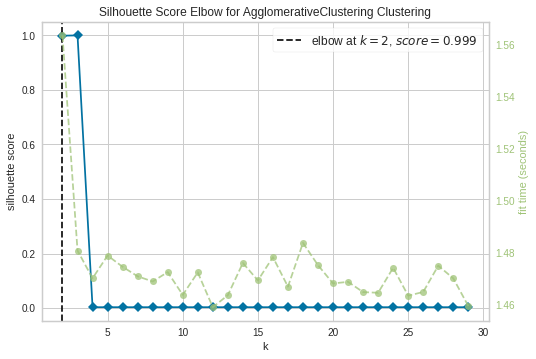

In [ ]:
# Silhouette Score pour Agglomerative Clustering
# Import ElbowVisualizer 
from yellowbrick.cluster import KElbowVisualizer 
model = AgglomerativeClustering() 
# k est la plage du nombre de clusters. 
visualizer = KElbowVisualizer(model, k=(2,30),metric='silhouette', timings= True) 
visualizer.fit(df) # Adapter les données au visualiseur 
visualizer.show() # Finaliser et rendre la figure

/usr/local/lib/python3.7/dist-packages/yellowbrick/cluster/elbow.py:330: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  self.estimator.fit(X, **kwargs)
/usr/local/lib/python3.7/dist-packages/yellowbrick/cluster/elbow.py:330: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  self.estimator.fit(X, **kwargs)
/usr/local/lib/python3.7/dist-packages/yellowbrick/cluster/elbow.py:330: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  self.estimator.fit(X, **kwargs)
/usr/local/lib/python3.7/dist-packages/yellowbrick/cluster/elbow.py:330: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  self.estimator.fit(X, **kwargs)
/usr/local/lib/python3.7/dist-packages/yellowbrick/cluster/elbow.py:

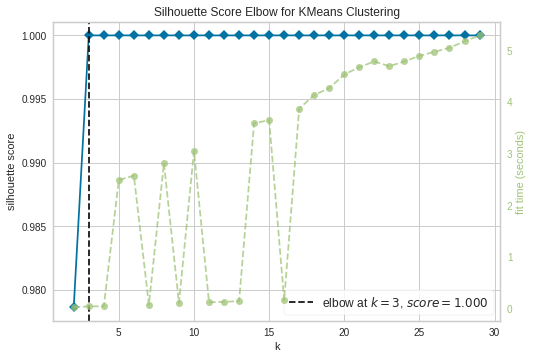

In [ ]:
# Silhouette Score pour KMeans
# Import ElbowVisualizer 
from yellowbrick.cluster import KElbowVisualizer 
model = KMeans() 
# k est la plage du nombre de clusters. 
visualizer = KElbowVisualizer(model, k=(2,30),metric='silhouette', timings= True) 
visualizer.fit(labels) # Adapter les données au visualiseur 
visualizer.show() # Finaliser et rendre la figure

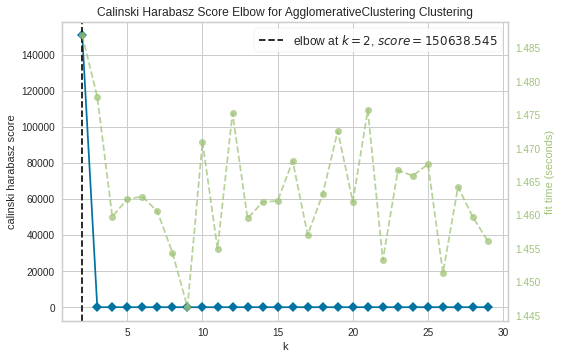

In [ ]:
# Calinski Harabasz Score pour Agglomerative Clustering
# Import ElbowVisualizer 
from yellowbrick.cluster import KElbowVisualizer 
model = AgglomerativeClustering() 
# k est la plage du nombre de clusters. 
visualizer = KElbowVisualizer(model, k=(2,30),metric='calinski_harabasz', timings= True) 
visualizer.fit(df) # Adapter les données au visualiseur 
visualizer.show() # Finaliser et rendre la figure

/usr/local/lib/python3.7/dist-packages/yellowbrick/cluster/elbow.py:330: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  self.estimator.fit(X, **kwargs)
/usr/local/lib/python3.7/dist-packages/yellowbrick/cluster/elbow.py:330: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  self.estimator.fit(X, **kwargs)
/usr/local/lib/python3.7/dist-packages/yellowbrick/cluster/elbow.py:330: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  self.estimator.fit(X, **kwargs)
/usr/local/lib/python3.7/dist-packages/yellowbrick/cluster/elbow.py:330: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  self.estimator.fit(X, **kwargs)
/usr/local/lib/python3.7/dist-packages/yellowbrick/cluster/elbow.py:

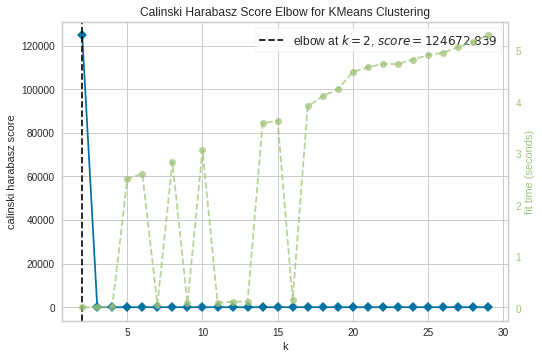

In [ ]:
# Calinski Harabasz Score pour KMeans
# Import ElbowVisualizer 
from yellowbrick.cluster import KElbowVisualizer 
model = KMeans() 
# k est la plage du nombre de clusters. 
visualizer = KElbowVisualizer(model, k=(2,30),metric='calinski_harabasz', timings= True) 
visualizer.fit(labels) # Adapter les données au visualiseur 
visualizer.show() # Finaliser et rendre la figure

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight

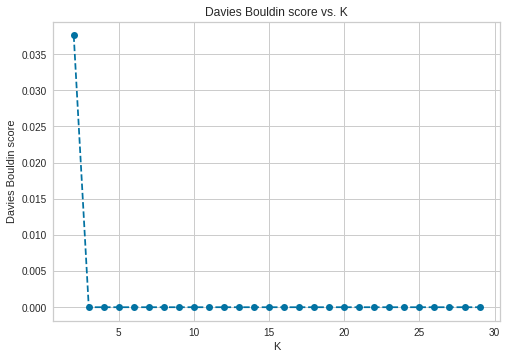

In [ ]:
# Davies Bouldin score for Kmeans
from sklearn.metrics import davies_bouldin_score
def get_kmeans_score(data, center):
    #instantiate kmeans
    km = KMeans(n_clusters=center)
# Then fit the model to your data using the fit method
    model = km.fit_predict(labels)
    
    # Calculate Davies Bouldin score
    score = davies_bouldin_score(labels, model)
    return score
scores = []
centers = list(range(2,30))
for center in centers:
    scores.append(get_kmeans_score(labels, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. K');